In [116]:
## libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import missingno as msno

In [2]:
## import data
ds = pd.read_csv('./data/DataScientist.csv')
de = pd.read_csv('./data/DataEngineer.csv')
da = pd.read_csv('./data/DataAnalyst.csv')

#da = pd.read_csv('./data/DataAnalyst.csv', index_col = 0)
#https://github.com/picklesueat/data_jobs_data

In [3]:
## drop 'Unnamed: 0' column
df_list = [ds, da, de]
for df in df_list:
    if 'Unnamed: 0' in df.columns:
        df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [4]:
## replace specifc values with nan
ds = ds.replace(['-1', -1, ' ', 'NULL'],np.nan)

In [ ]:
## Univariate analysis

In [5]:
## calculate missing percent
percent_missing = round(ds.isnull().sum() * 100 / len(ds),3)
missing_value_df = pd.DataFrame({'column_name': ds.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending= False, inplace=True)

missing_value_df = missing_value_df.reset_index()
missing_value_df.drop('index', axis = 1, inplace=True) #0 rows, 1 columns

print(missing_value_df)


In [6]:
## drop column at specific na% (>60%)
print(missing_value_df[missing_value_df['percent_missing'] > 60])
ds = ds.dropna(thresh=ds.shape[0]*0.6, how = 'all', axis = 1)

   column_name  percent_missing
0   Easy Apply           95.805
1  Competitors           70.606


In [9]:
## job title
job_title_counts = ds['Job Title'].value_counts()

## lower case the column
ds['job_title'] = ds['Job Title'].str.lower()

In [118]:
print(ds['Job Title'].value_counts().head((10))) 

Data Scientist                   274
Data Engineer                    260
Data Analyst                     246
Senior Data Scientist             91
Machine Learning Engineer         47
Senior Data Analyst               47
Big Data Engineer                 41
Business Intelligence Analyst     39
Senior Data Engineer              37
Lead Data Scientist               23
Name: Job Title, dtype: int64


In [14]:
## keep only jobs related to data science & machine learning
ds_jobs_list = ['data science', 'data scientist', 'machine learning', 'ml']

tmp = ds.job_title.str.contains("|".join(ds_jobs_list))

ds2 = ds.copy()
ds2.loc[~tmp, "job_title"] = np.nan

ds2 = ds2[ds2['job_title'].notna()]


In [18]:
## job title
job_title_counts2 = ds2['job_title'].value_counts()
job_title_counts2 = pd.DataFrame({'job':job_title_counts2.index, 'count':job_title_counts2.values})

In [19]:
## transform sr. to senior, ml to machine learning, data science to data scientist
replace_values = {'sr' : 'senior', 'ml' : 'machine learning', 'data science' : 'data scientist', 'jr.': 'junior'}
ds2 = ds2.replace({'job_title': replace_values})

#ds2['job_title'] = ds2['job_itle'].str.replace('sr.', 'senior')

In [23]:
## replace job titles by cases
ds2['job_title_main'] = np.where(ds2.job_title.str.contains('manager'), 'manager/director',
np.where(ds2.job_title.str.contains('director'), 'manager/director',
np.where(ds2.job_title.str.contains('lead'), 'lead',
np.where(ds2.job_title.str.contains('senior'), 'senior/principal',
np.where(ds2.job_title.str.contains('principal'), 'senior/principal',
np.where(ds2.job_title.str.contains('junior'), 'junior',
np.where(ds2.job_title.str.contains('intern'), 'internship',
np.where(ds2.job_title.str.contains('machine learning'), 'machine learning', 'data scientist'))))))))

In [24]:
## job title main
job_title_counts3 = ds2['job_title_main'].value_counts()
job_title_counts3 = pd.DataFrame({'job':job_title_counts3.index, 'count':job_title_counts3.values})

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'data scientist'),
  Text(1, 0, 'senior/principal'),
  Text(2, 0, 'machine learning'),
  Text(3, 0, 'lead'),
  Text(4, 0, 'manager/director'),
  Text(5, 0, 'internship'),
  Text(6, 0, 'junior')])

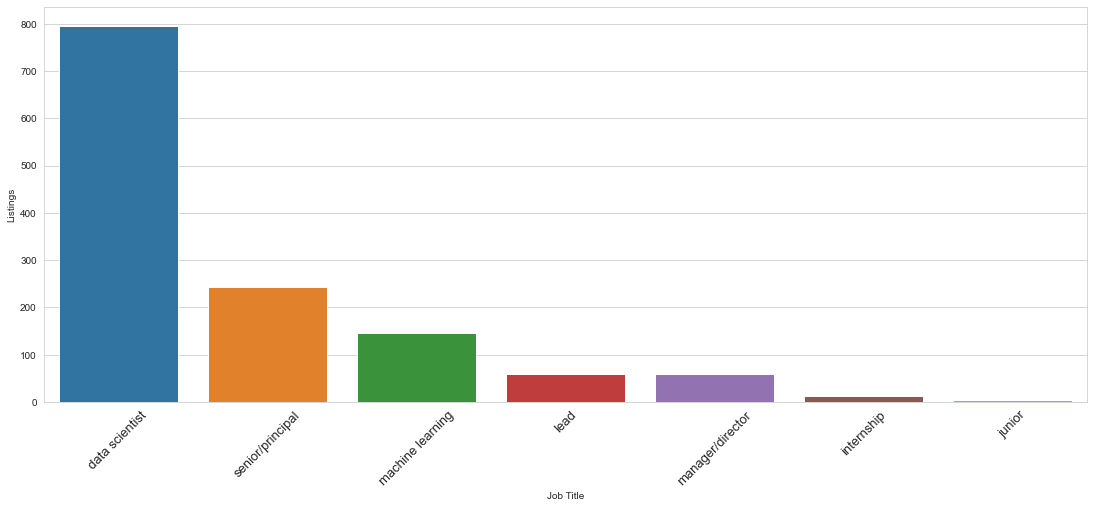

In [132]:
dims = (18.7, 7.27)
fig, ax = plt.subplots(figsize=dims)

sns.barplot(x = job_title_counts3['job'][0:10], y = job_title_counts3['count'][0:10], data = job_title_counts3)

plt.xlabel('Job Title')
plt.ylabel('Listings')
plt.xticks(rotation=45)
plt.xticks(fontsize=13)

In [ ]:
## most positions are listed with the general naming 'data scientist', 'junior' having the least number of job announcements
## 'manager', 'director', 'lead' categories present a low number of posted jobs
## following the first category, people with experience are the most wanted

In [26]:
## location
loc = ds2.Location.value_counts()
location_value_counts = pd.DataFrame({'location': loc.index, 'count': loc.values})

del loc

In [28]:
## split into city and state
location_split = ds2['Location'].str.split(',', expand = True)
ds2['city'], ds2['state'] = location_split[0], location_split[1]

In [ ]:
print(ds2.state.value_counts())

ds2 = ds2[(ds2.state != 'United Kingdom')]

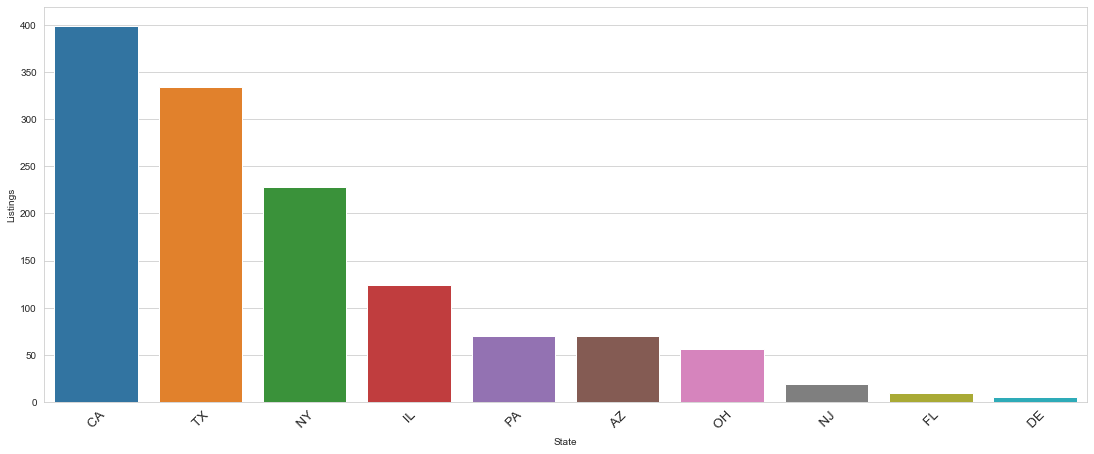

In [145]:
## state
state = ds2.state.value_counts()
state_value_counts = pd.DataFrame({'state': state.index, 'count': state.values})

dims = (18.7, 7.27)
fig, ax = plt.subplots(figsize=dims)

sns.barplot(x = state_value_counts['state'][0:10], y = state_value_counts['count'][0:10], data = state_value_counts)

plt.xlabel('State');
plt.ylabel('Listings');
plt.xticks(rotation=45);
plt.xticks(fontsize=13);

In [152]:
## industry
ind = ds2.Industry.value_counts()
industry_value_counts = pd.DataFrame({'industry': ind.index, 'count': ind.values})

del ind

industry_value_counts.head(10)

,industry,count
0,Computer Hardware & Software,152
1,Internet,152
2,IT Services,149
3,Enterprise Software & Network Solutions,68
4,Staffing & Outsourcing,67
5,Consulting,49
6,Insurance Carriers,46
7,Advertising & Marketing,42
8,Health Care Services & Hospitals,38
9,Investment Banking & Asset Management,37


In [40]:
sect = ds2.Sector.value_counts()
sector_value_counts = pd.DataFrame({'sector': sect.index, 'count': sect.values})

del sect

## select sectors <= 20 obs
sector_few_vals = sector_value_counts[sector_value_counts['count'] <= 20]['sector']

## replace with 'Other'
ds2['sector_main'] = np.where(ds2.Sector.isin(sector_few_vals), 'Other', ds2['Sector'])

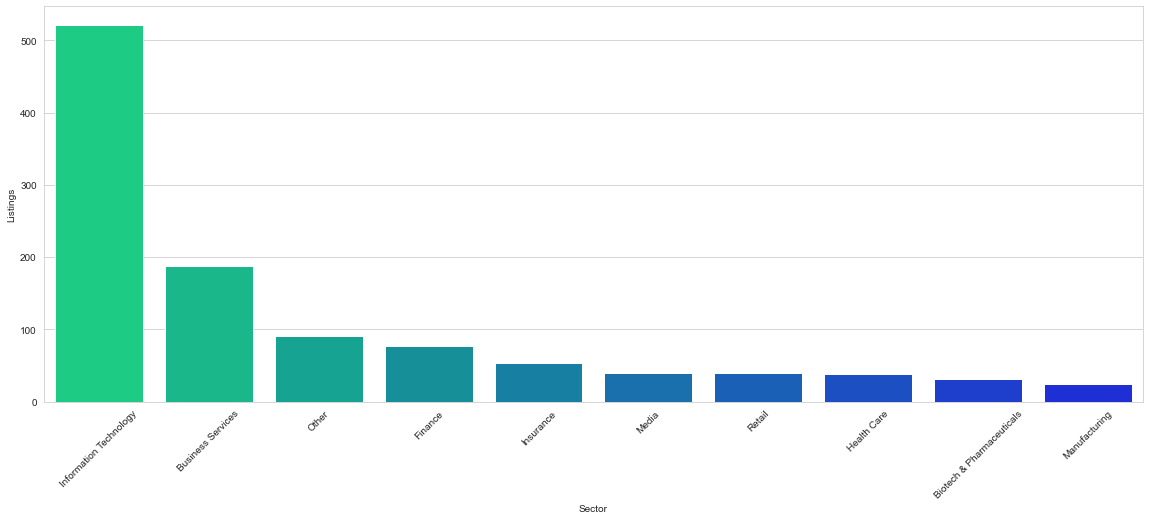

In [151]:
sect = ds2.sector_main.value_counts()
sector_value_counts = pd.DataFrame({'sector': sect.index, 'count': sect.values})

del sect

dims = (19.7, 7.27)
fig, ax = plt.subplots(figsize=dims)

sns.barplot(x = sector_value_counts['sector'][0:10], y = sector_value_counts['count'][0:10], data = sector_value_counts, palette = 'winter_r')

plt.xlabel('Sector');
plt.ylabel('Listings');
plt.xticks(rotation=45);
plt.xticks(fontsize=10);

In [25]:
#char_df = ds2.select_dtypes(include = ['object'])

In [44]:
# compute company age
ds2['company_age'] = 2020 - ds2['Founded'] ## 2020 the year when the data was retrieved

In [46]:
salary = ds2['Salary Estimate'].value_counts()

In [52]:
## replace values in salary
ds2['salary_estimate'] = ds2['Salary Estimate'].str.replace("$", "").str.replace("K", "").str.replace("(Glassdoor est.)", "")
ds2['salary_estimate'] = ds2['salary_estimate'].str.replace("(", " ")
ds2['salary_estimate'] = ds2['salary_estimate'].str.replace(")", " ")
ds2['salary_estimate'] = ds2['salary_estimate'].str.replace("Employer est. ", "")

<ipython-input-52-a252bd8cb634>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  ds2['salary_estimate'] = ds2['Salary Estimate'].str.replace("$", "").str.replace("K", "").str.replace("(Glassdoor est.)", "")
<ipython-input-52-a252bd8cb634>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  ds2['salary_estimate'] = ds2['Salary Estimate'].str.replace("$", "").str.replace("K", "").str.replace("(Glassdoor est.)", "")


In [58]:
## split into min and max
salary_split = ds2['salary_estimate'].str.split('-', expand = True)
ds2['min_salary'], ds2['max_salary'] = salary_split[0], salary_split[1]

## remove 3 rows with salary per hour
ds2 = ds2[~ds2.max_salary.str.contains('Hour')]

In [70]:
ds2.min_salary = ds2.min_salary.astype(int)
ds2.max_salary = ds2.max_salary.astype(int)

print(ds2.min_salary.min()) #12
print(ds2.max_salary.max()) #254

In [79]:
## compute average salary based on min and max
ds2['avg_salary'] = (ds2.min_salary+ds2.max_salary)/2

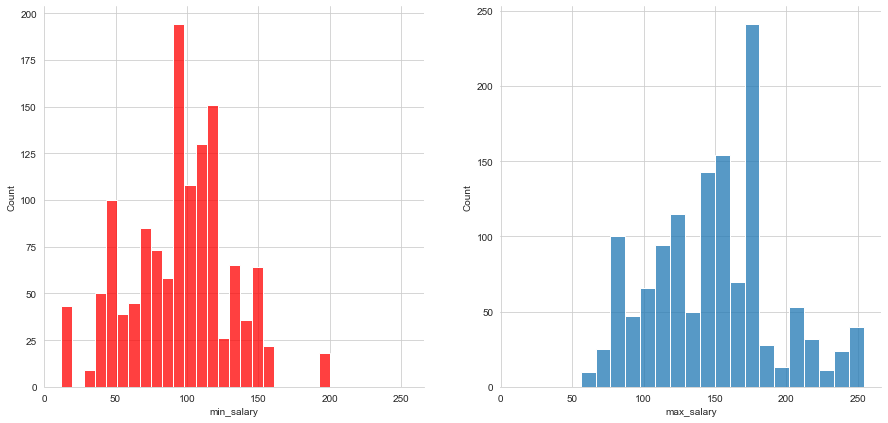

In [165]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7), sharex=True)
sns.despine(left=True)
sns.histplot(ds2['min_salary'],color = 'r', ax=ax1)
sns.histplot(ds2['max_salary'], ax=ax2)
plt.show();

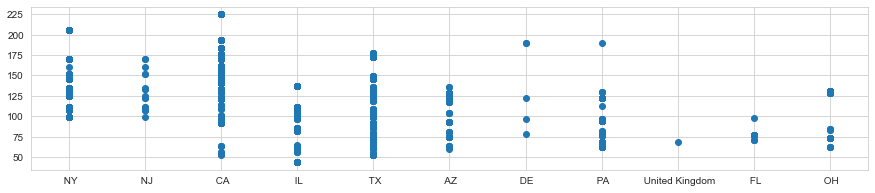

In [135]:
plt.figure(figsize=(15,3))

## bar plot - relationship between avg. salary and state
plt.scatter(ds2["state"].astype(str), ds2["avg_salary"])
#plt.margins(x=0.5)
plt.show()

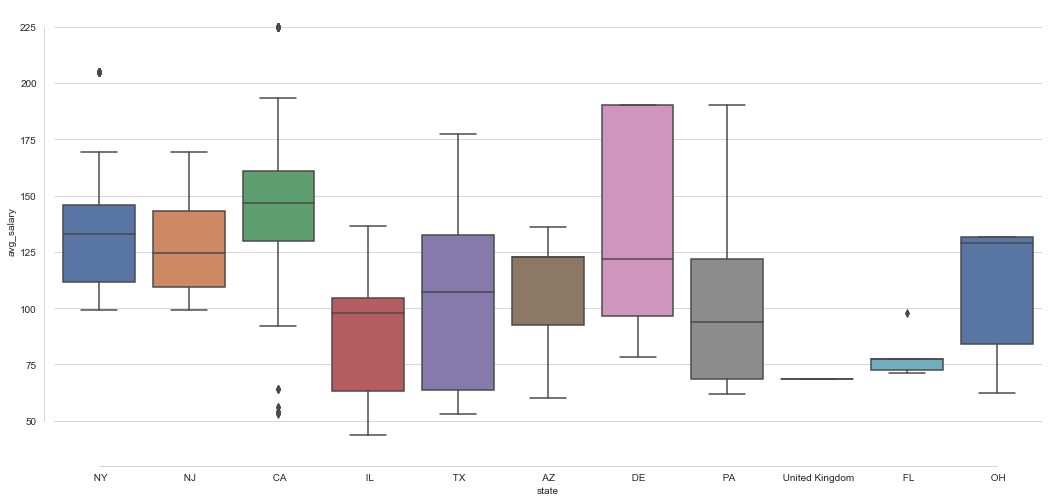

In [173]:
dims = (17.7, 8.27)
fig, ax = plt.subplots(figsize=dims)

sns.set_style("whitegrid")
sns.boxplot(data = ds2, x = "state", y = "avg_salary", palette = 'deep')
sns.despine(offset=10, trim = True)

In [77]:
ds2.Revenue.value_counts()

Unknown / Non-Applicable            416
$10+ billion (USD)                  298
$100 to $500 million (USD)           92
$10 to $25 million (USD)             64
$1 to $5 million (USD)               57
$5 to $10 billion (USD)              53
$1 to $2 billion (USD)               48
$25 to $50 million (USD)             44
$2 to $5 billion (USD)               40
$5 to $10 million (USD)              36
$50 to $100 million (USD)            35
Less than $1 million (USD)           31
$500 million to $1 billion (USD)     22
Name: Revenue, dtype: int64

In [78]:
ds2.Size.value_counts()

10000+ employees           408
1 to 50 employees          198
51 to 200 employees        171
1001 to 5000 employees     170
201 to 500 employees       129
501 to 1000 employees       86
5001 to 10000 employees     47
Unknown                     27
Name: Size, dtype: int64

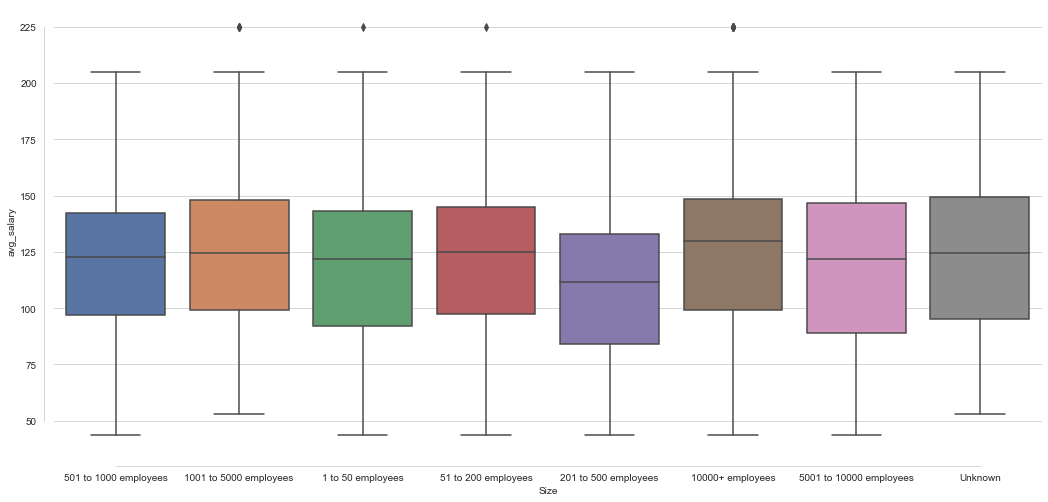

In [179]:
dims = (17.7, 8.27)
fig, ax = plt.subplots(figsize=dims)

sns.set_style("whitegrid")
sns.boxplot(data = ds2, x = "Size", y = "avg_salary", palette = 'deep')
sns.despine(offset=10, trim = True)

In [97]:
state = ds2.state.value_counts()
state_value_counts = pd.DataFrame({'state': state.index, 'count': state.values})
del state

## select sectors <= 20 obs
state_few_vals = state_value_counts[state_value_counts['count'] <= 20]['state']
del state_value_counts

## replace with 'Other'

ds2['state2'] = np.where(ds2.state.isin(state_few_vals), 'Other', ds2['state'])

In [87]:
ds2.job_title_main.value_counts()

data scientist      793
senior/principal    244
machine learning    145
manager/director     59
lead                 59
internship           12
junior                4
Name: job_title_main, dtype: int64

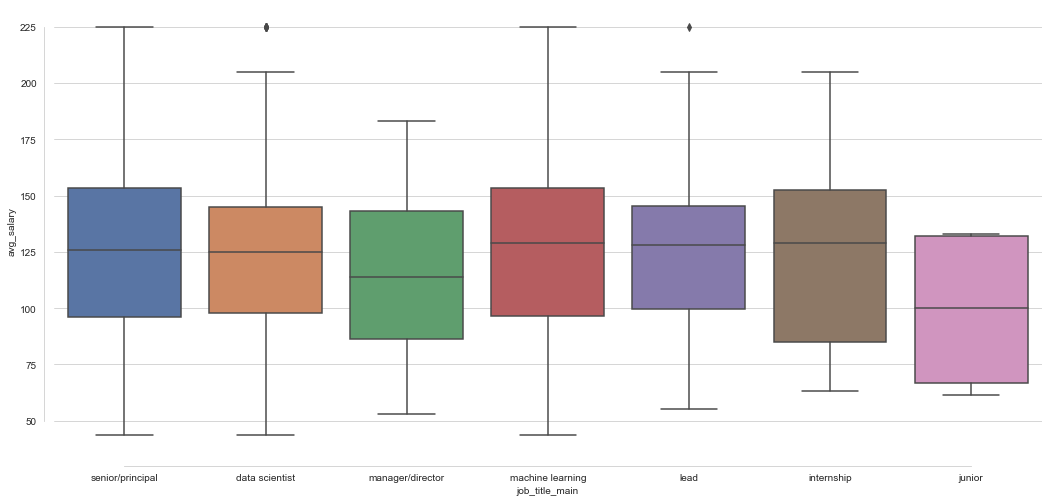

In [182]:
dims = (17.7, 8.27)
fig, ax = plt.subplots(figsize=dims)

sns.set_style("whitegrid")
sns.boxplot(data = ds2, x = "job_title_main", y = "avg_salary", palette = 'deep')
sns.despine(offset=10, trim = True)

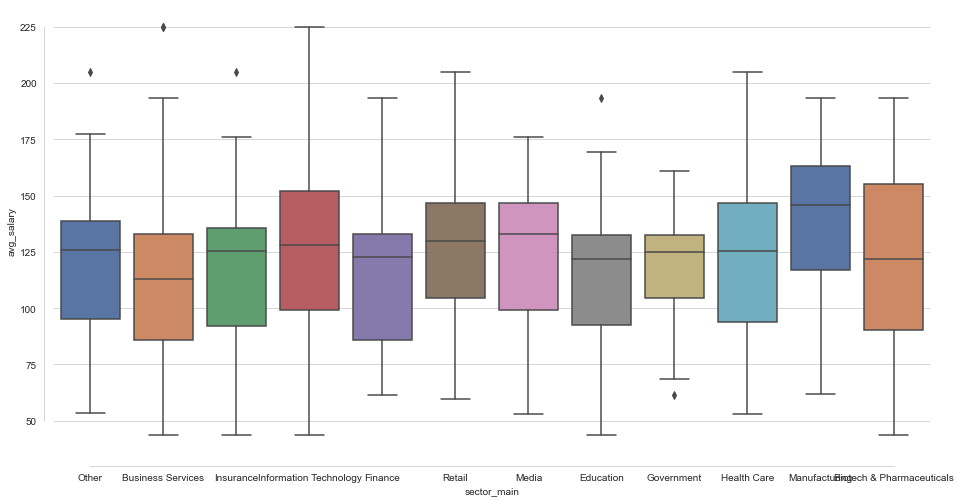

In [167]:
dims = (15.7, 8.27)
fig, ax = plt.subplots(figsize=dims)

sns.set_style("whitegrid")
sns.boxplot(data = ds2, x = "sector_main", y = "avg_salary", palette = 'deep')
sns.despine(offset=10, trim = True)

In [106]:
print(ds2['Type of ownership'].value_counts())

own = ds2['Type of ownership'].value_counts()
own_value_counts = pd.DataFrame({'own': own.index, 'count': own.values})
del own

## select sectors <= 20 obs
own_few_vals = own_value_counts[own_value_counts['count'] <= 20]['own']
del own_value_counts

## replace with 'Other'

ds2['ownership'] = np.where(ds2['Type of ownership'].isin(own_few_vals), 'Other', ds2['Type of ownership'])

Company - Private                 603
Company - Public                  470
Subsidiary or Business Segment     62
Nonprofit Organization             43
Government                         19
College / University               15
Unknown                            10
Contract                            9
Private Practice / Firm             3
Hospital                            1
Self-employed                       1
Name: Type of ownership, dtype: int64


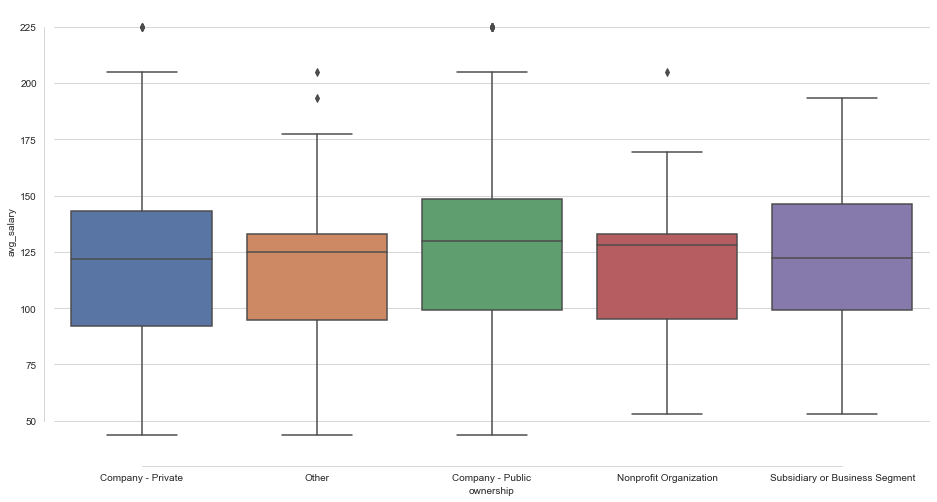

In [168]:
dims = (15.7, 8.27)
fig, ax = plt.subplots(figsize=dims)

sns.set_style("whitegrid")
sns.boxplot(data = ds2, x = "ownership", y = "avg_salary", palette = 'deep')
sns.despine(offset=10, trim = True)

In [169]:
import plotly.express as px

fig = px.scatter(ds2, x=ds2['Rating'], y= ds2['avg_salary'])
fig.update_layout(title = 'Relation between average salary and rating of companies')
fig.show()

In [180]:

fig = px.scatter(ds2, x=ds2['Rating'], y= ds2['company_age'])
fig.update_layout(title = 'Relation between rating and company age')
fig.show()

In [181]:
fig = px.scatter(ds2, x=ds2['company_age'], y= ds2['avg_salary'])
fig.update_layout(title = 'Relation between average salary and company age')
fig.show()